In [1]:
 #imports
import warnings

warnings.filterwarnings("ignore")
%autosave 0

Autosave disabled


In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#custom imports
from env import get_connection

# Exercises
> The end result of this exercise should be a file named prepare.py.

* **Using your store items data:**

In [3]:
url = get_connection('tsa_item_demand')

query = '''
        SELECT sale_date, sale_amount, 
        item_brand, item_name, item_price, 
        store_address, store_zipcode, 
        store_city, store_state
        FROM sales
        LEFT JOIN items USING(item_id)
        LEFT JOIN stores USING(store_id)
        '''

def get_tsa():
    '''
    a function that searches for and retieves data. 
    if it does not find it it will retirve the data 
    from os it will query database and pull from
    url
    '''

    filename = 'tsa_item_data.csv'

    if os.path.isfile(filename):

        return pd.read_csv(filename)
        
    else:
        
        df = pd.read_sql(query, url)
        df.to_csv(filename, index=0)

        return df

In [4]:
df = get_tsa()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


## 1. Convert date column to datetime format.

In [5]:
df.sale_date = pd.to_datetime(df.sale_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  int64         
 7   store_city     913000 non-null  object        
 8   store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 62.7+ MB


## 2. Plot the distribution of sale_amount and item_price.

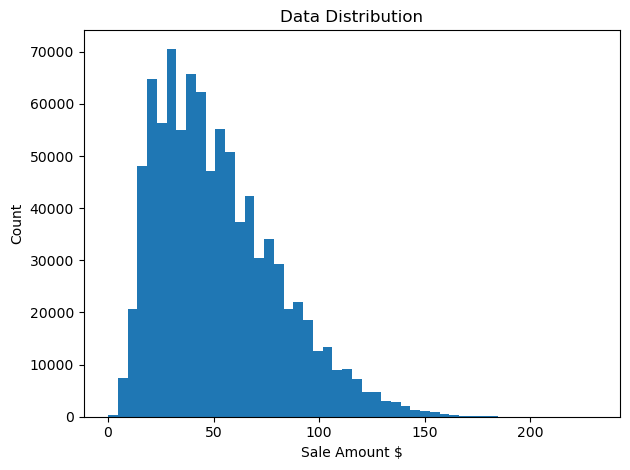

In [6]:
plt.hist(df.sale_amount, bins=50)
plt.title('Data Distribution')
plt.xlabel('Sale Amount $')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

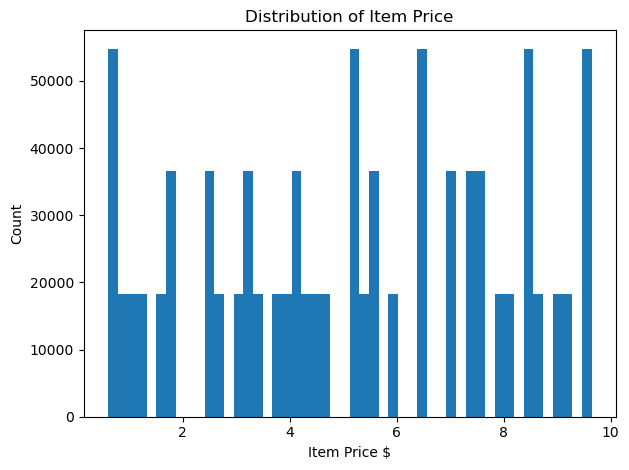

In [7]:
plt.hist(df.item_price, bins=50)
plt.title('Distribution of Item Price')
plt.xlabel('Item Price $')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 3. Set the index to be the datetime variable.

In [8]:
df = df.set_index('sale_date')
df = df.sort_values('sale_date')
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


## 4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.month_name()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [10]:
df['day_of_week'] = df.index.day_name()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [11]:
def prep_tsa():
    df = get_tsa()
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date')
    df = df.sort_values('sale_date')
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()

    return df

In [12]:
df = prep_tsa()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday


In [13]:
import acquire as a
import prepare as p

In [14]:
df = a.get_tsa()
df.head(1)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [15]:
df = p.prep_tsa()
df.head(1)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday


> **acquire.py and prepare.py completed**

In [16]:
import urllib.request
import requests

url: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [17]:
# Tried to use not, an API url

# url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
# response = requests.get(url)
# print(response.text)

> Resource: https://docs.python.org/3/library/urllib.request.html  
>  
> **Note: The urllib.request module defines functions and classes which help in opening URLs (mostly HTTP) in a complex world — basic and digest authentication, redirections, cookies and more.**

In [18]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
urllib.request.urlretrieve(url, 'opsd_germany_daily.csv')

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
df = pd.read_csv('opsd_germany_daily.csv')

In [ ]:
df.head()

In [ ]:
def opsd_data():
    url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
    urllib.request.urlretrieve(url, 'opsd_germany_daily.csv')
    df = pd.read_csv('opsd_germany_daily.csv')

    return df

In [ ]:
df = opsd_data()

In [ ]:
# noticed date is listed as object
df.info()

* **Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**

## 1. Convert date column to datetime format.

In [ ]:
# cleaned up columns names prior to conversion
df.columns = [col.lower().replace('+', '_') for col in df.columns]
df.head()

In [ ]:
# convert datetime
df.date = pd.to_datetime(df.date)
df.head()

In [ ]:
# confirmed change
df.info()

## 2. Plot the distribution of each of your variables.

In [ ]:
for column in df.columns:
    plt.hist(df[column], bins=100)
    plt.title(f'Data Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## 3. Set the index to be the datetime variable.

In [ ]:
df = df.set_index('date')
df = df.sort_values('date')
df.head()

## 4. Add a month and a year column to your dataframe.

In [ ]:
df['month'] = df.index.strftime('%B')
df.head()

In [ ]:
df.index.year.value_counts()

> Resource: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html  
>  
> **Note: Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.**

In [ ]:
# df['year'] = pd.DatetimeIndex(df.index).year
# df.head()

In [ ]:
df['year'] = df.index.year
df.head()

In [ ]:
df.info()

In [ ]:
#confirmed the column had all values; previously was only returning 2007
df.year.value_counts()

## 5. Fill any missing values.

In [ ]:
# three columns have missing values
df.isna().sum()

In [ ]:
df.wind.isna().value_counts(),

In [ ]:
df.solar.isna().value_counts(),

In [ ]:
df.wind_solar.isna().value_counts()

In [ ]:
df.mean()

In [ ]:
# filled respective column with nan values with mean
df = df.fillna(mean_values)

In [ ]:
df.head()

In [ ]:
# checked to see if all nan values were filled
df.isna().sum()

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_opsd():
    df = opsd_data()
    df.columns = [col.lower().replace('+', '_') for col in df.columns]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.sort_values('date')
    df['month'] = df.index.strftime('%B')
    df['year'] = df.index.year
    mean_values = df.mean()
    df = df.fillna(mean_values)

    return df

df = prep_opsd()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df = a.opsd_data()
df.head(1)

In [ ]:
df = p.prep_opsd()
df.head(1)